# **Movie Rating Prediction**

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the data

In [2]:
movie_rating_data=pd.read_csv('/content/drive/MyDrive/CodSoft/IMDb_Movies_India.csv', encoding = 'latin1')
movie_rating_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Preprocessing the data

In [3]:
movie_rating_data.shape

(15509, 10)

In [4]:
movie_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
movie_rating_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
movie_rating_data.dropna(inplace=True)

In [7]:
movie_rating_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [8]:
movie_rating_data.shape

(5659, 10)

## Analyzing Data

In [9]:
movie_rating_data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


<function matplotlib.pyplot.show(close=None, block=None)>

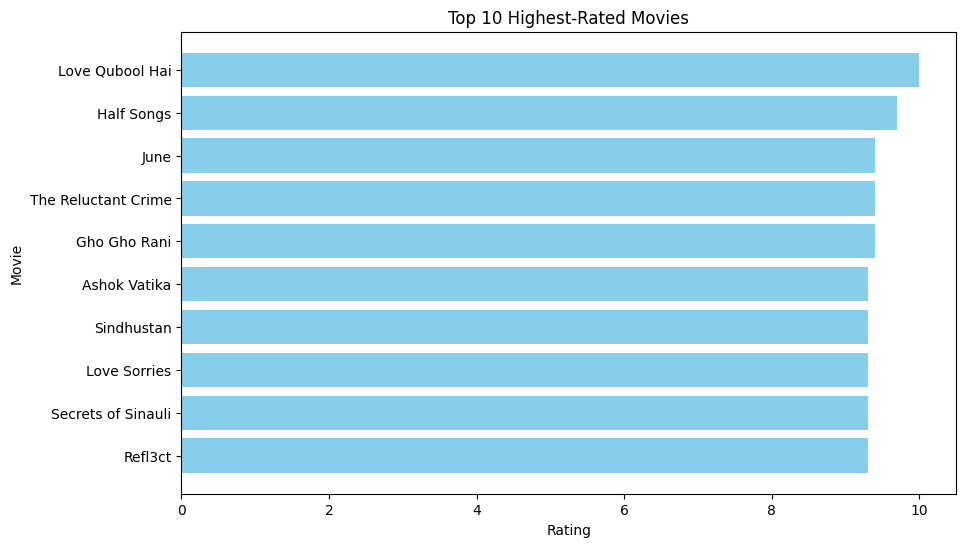

In [10]:
top_rated_movies= movie_rating_data.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show

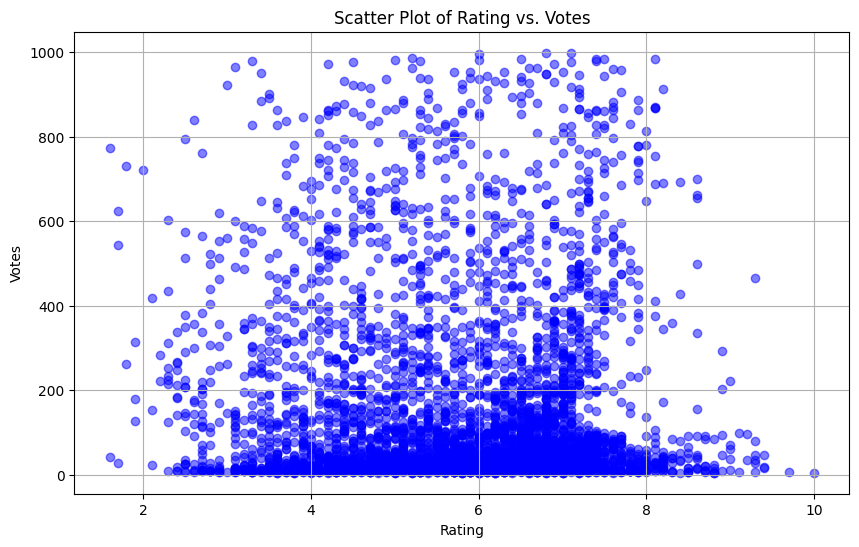

In [11]:
movie_rating_data['Votes'] = pd.to_numeric(movie_rating_data['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(movie_rating_data['Rating'], movie_rating_data['Votes'], alpha=0.5, color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)

Text(0.5, 1.0, 'Top 10 Actors by Number of Movies Performed')

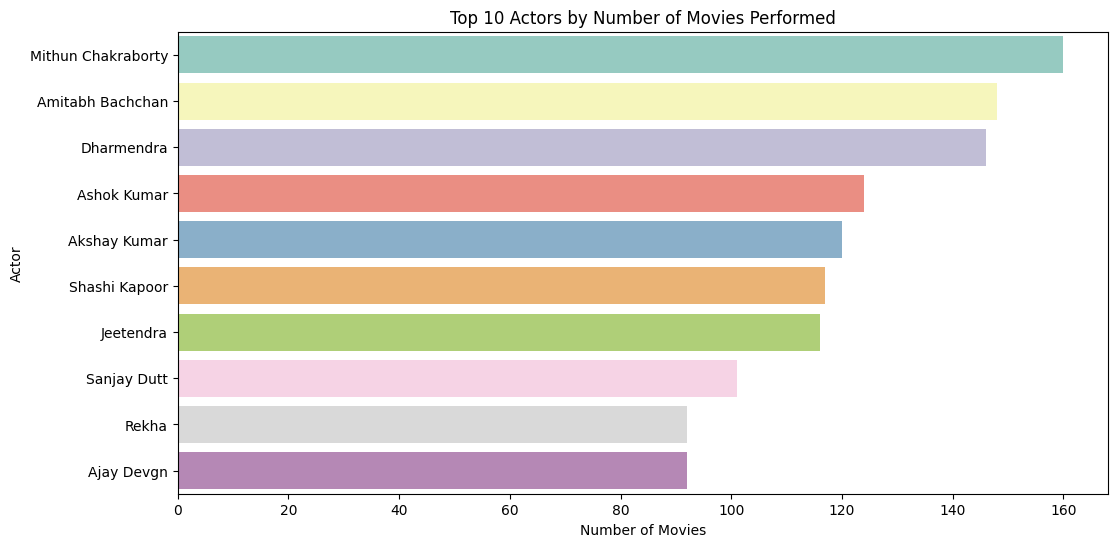

In [12]:
actors = pd.concat([movie_rating_data['Actor 1'], movie_rating_data['Actor 2'], movie_rating_data['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns= ['Actor', 'Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Movies', y='Actor', data= actor_counts.head(10), palette='Set3')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')

Text(0.5, 1.02, 'Pair Plot of Voting, Rating and Year')

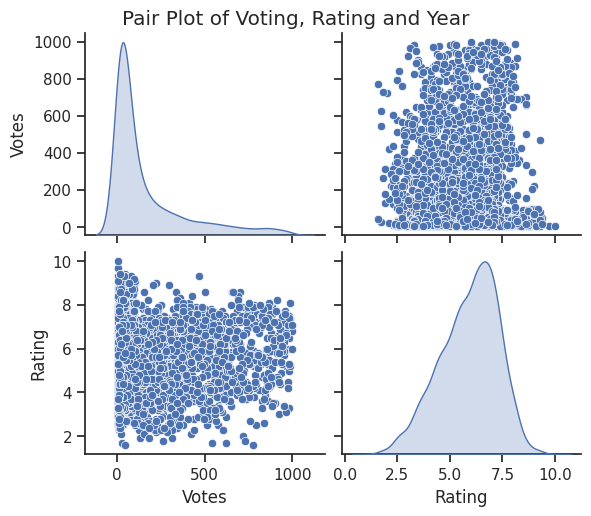

In [13]:
columns_of_interest= ['Votes', 'Rating', 'Year']
sns.set(style='ticks')
sns.pairplot(movie_rating_data[columns_of_interest], diag_kind='kde', markers='o', height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating and Year',y=1.02)

## Model Training

In [14]:
label_encoders = {}
categorical_features = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']
for feature in categorical_features:
    le = LabelEncoder()
    movie_rating_data[feature] = le.fit_transform(movie_rating_data[feature])
    label_encoders[feature] = le

In [15]:
#separating featurs & target
X = movie_rating_data[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = movie_rating_data['Rating']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

In [18]:
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [19]:
best_xgb_model = grid_search.best_estimator_

In [20]:
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
y_pred = best_xgb_model.predict(X_test)

## Model Evaluation

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1.02
Mean Squared Error (MSE): 1.66
Root Mean Squared Error (RMSE): 1.29
R-squared (R2): 0.10
